In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [4]:
df.shape

(3554, 18)

In [5]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3,2,2,2.0,New Property,850.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8597.0,2,2,2,4.0,New Property,1226.0,1,1,0,0,0,0,38
2,flat,breez global hill view,sohna road,0.32,5470.0,2,2,1,17.0,New Property,1000.0,0,0,0,0,0,0,49
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3,4,3+,10.0,Relatively New,1615.0,0,1,0,0,1,1,174
4,flat,suncity avenue,sector 102,0.48,9023.0,2,2,1,5.0,Relatively New,582.0,0,0,1,0,0,0,159


In [6]:
train_df = df.drop(columns=['society', 'price_per_sqft'])
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 36,0.82,3,2,2,2.0,New Property,850.0,0,0,0,0,0,0,8
1,flat,sector 89,0.95,2,2,2,4.0,New Property,1226.0,1,1,0,0,0,0,38
2,flat,sohna road,0.32,2,2,1,17.0,New Property,1000.0,0,0,0,0,0,0,49
3,flat,sector 92,1.60,3,4,3+,10.0,Relatively New,1615.0,0,1,0,0,1,1,174
4,flat,sector 102,0.48,2,2,1,5.0,Relatively New,582.0,0,0,1,0,0,0,159


#### luxury_score

We are going to convert luxury_score into 3 categories because it will be easy for the user to distinguish

Same for floorNum

<Axes: xlabel='luxury_score'>

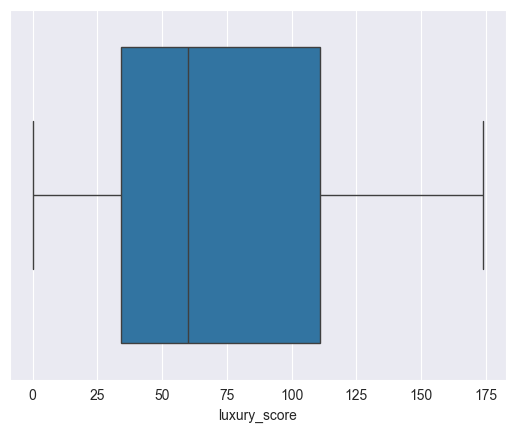

In [8]:
sns.boxplot(x=df['luxury_score'])

In [9]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score <= 150:
        return 'Medium'
    elif 150 <= score <= 175:
        return 'High'
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [10]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 36,0.82,3,2,2,2.0,New Property,850.0,0,0,0,0,0,0,8,Low
1,flat,sector 89,0.95,2,2,2,4.0,New Property,1226.0,1,1,0,0,0,0,38,Low
2,flat,sohna road,0.32,2,2,1,17.0,New Property,1000.0,0,0,0,0,0,0,49,Low
3,flat,sector 92,1.60,3,4,3+,10.0,Relatively New,1615.0,0,1,0,0,1,1,174,High
4,flat,sector 102,0.48,2,2,1,5.0,Relatively New,582.0,0,0,1,0,0,0,159,High


#### floorNum

<Axes: xlabel='floorNum'>

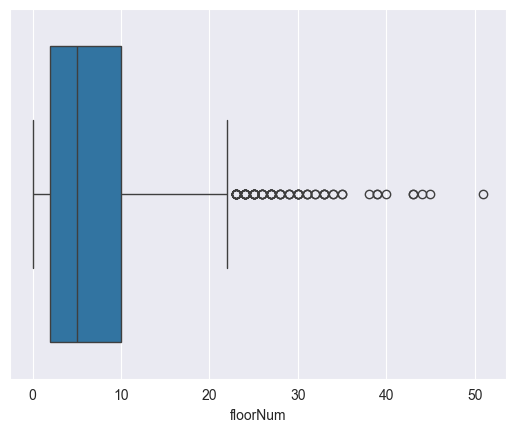

In [11]:
sns.boxplot(x=df['floorNum'])

In [12]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return 'Low Floor'
    elif 3 <= floor <= 10:
        return 'Mid Floor'
    elif 11 <= floor <= 51:
        return 'High Floor'
    else:
        return None  # or "Undefined" or any other label for outside the defined bins

In [13]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [14]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,sector 36,0.82,3,2,2,2.0,New Property,850.0,0,0,0,0,0,0,8,Low,Low Floor
1,flat,sector 89,0.95,2,2,2,4.0,New Property,1226.0,1,1,0,0,0,0,38,Low,Mid Floor
2,flat,sohna road,0.32,2,2,1,17.0,New Property,1000.0,0,0,0,0,0,0,49,Low,High Floor
3,flat,sector 92,1.60,3,4,3+,10.0,Relatively New,1615.0,0,1,0,0,1,1,174,High,Mid Floor
4,flat,sector 102,0.48,2,2,1,5.0,Relatively New,582.0,0,0,1,0,0,0,159,High,Mid Floor


#### Converting categories from english to numbers

In [17]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for Label Encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply Label encoding to categorical cols
for col in categorical_cols:
    ord_enc = OrdinalEncoder()
    data_label_encoded[col] = ord_enc.fit_transform(data_label_encoded[[col]])
    print(ord_enc.categories_)

# Splitting the datasets into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'sector 1',
       'sector 10', 'sector 102', 'sector 103', 'sector 104',
       'sector 105', 'sector 106', 'sector 107', 'sector 108',
       'sector 109', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 30', 'sector 31', 'sector 33',
       'sector 36', 'sector 37', 'sector 37d', 'sector 38', 'sector 39',
       'sector 4', 'sector 40', 'sector 41', 'sector 43', 'sector 45',
       'sector 46', 'sector 47', 'sector 48', 'sector 49', 'sector 5',
       'sector 50', 'sector 51', 'sector 52', 'sector 53', 'sector 54',
       'sector 55', 'sector 56', 'sector 57', 'sector 58', 'sector 59',
       'sector 6', 'sector 60', 'sector 61', 'sector 62', 

In [18]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,0.0,36.0,3,2,2.0,2.0,1.0,850.0,0,0,0,0,0,0,8,1.0,1.0
1,0.0,95.0,2,2,2.0,4.0,1.0,1226.0,1,1,0,0,0,0,38,1.0,2.0
2,0.0,103.0,2,2,1.0,17.0,1.0,1000.0,0,0,0,0,0,0,49,1.0,0.0
3,0.0,99.0,3,4,4.0,10.0,3.0,1615.0,0,1,0,0,1,1,174,0.0,2.0
4,0.0,5.0,2,2,1.0,5.0,3.0,582.0,0,0,1,0,0,0,159,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,90.0,2,2,1.0,5.0,3.0,532.0,0,0,0,0,0,0,73,2.0,2.0
3550,1.0,12.0,5,5,4.0,2.0,3.0,6228.0,1,1,1,1,0,0,160,0.0,1.0
3551,0.0,23.0,1,1,1.0,5.0,0.0,665.0,0,0,0,0,0,1,67,2.0,2.0
3552,1.0,44.0,5,6,3.0,3.0,0.0,5490.0,1,1,1,1,0,0,76,2.0,2.0


We have used ordinal encoding which means we assign 1, 2, 3 to different categories.

For linear models this will be a problem because it plots a graph and assumes as the value increases from 1 to 3 there is a relation there. Which will not be the case in tree based model where they put lines and divide the data and does not care about the linear relations Similarly boosting algos where non linear relation is captured

## Feature Selection starts

#### Technique 1 - Correlation Analysis

<Axes: >

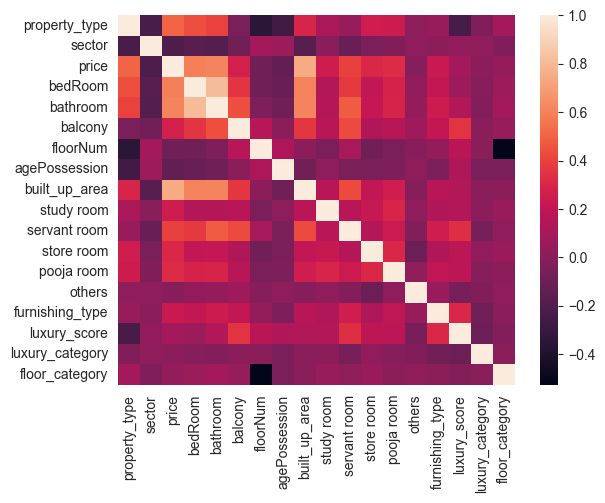

In [19]:
# linearly correlated features 
sns.heatmap(data_label_encoded.corr())

In [33]:
fi_df1 = data_label_encoded.corr()[['price']].drop('price').reset_index().rename(
    columns={'index': 'feature', 'price': 'corr_coeff'})

In [34]:
print(fi_df1.sort_values(by='corr_coeff', ascending=False))

            feature  corr_coeff
7     built_up_area    0.748574
3          bathroom    0.609777
2           bedRoom    0.591289
0     property_type    0.503728
9      servant room    0.391930
11       pooja room    0.319852
10       store room    0.305677
4           balcony    0.269637
8        study room    0.242955
13  furnishing_type    0.225625
14     luxury_score    0.091473
16   floor_category    0.042745
15  luxury_category    0.007064
12           others   -0.013064
5          floorNum   -0.087442
6     agePossession   -0.134171
1            sector   -0.212084


#### Technique 2 - Random Forest Feature Importance

In [28]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on Label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({'feature': X_label.columns,
                       'rf_importance': rf_label.feature_importances_}).sort_values(by='rf_importance', ascending=False)

In [30]:
print(fi_df2)

            feature  rf_importance
7     built_up_area       0.642413
0     property_type       0.098952
1            sector       0.091697
14     luxury_score       0.030328
3          bathroom       0.023264
2           bedRoom       0.020918
5          floorNum       0.017868
9      servant room       0.016436
6     agePossession       0.011722
4           balcony       0.010077
13  furnishing_type       0.008252
10       store room       0.007078
8        study room       0.006965
11       pooja room       0.005202
15  luxury_category       0.004009
16   floor_category       0.002686
12           others       0.002133


#### Technique 3 - Gradient Boosting Feature Importances

In [31]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Gradient Boosting Regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({'feature': X_label.columns,
                       'gb_importance': gb_label.feature_importances_}).sort_values(by='gb_importance', ascending=False)

In [32]:
print(fi_df3)

            feature  gb_importance
7     built_up_area       0.681488
1            sector       0.098078
0     property_type       0.095047
2           bedRoom       0.036971
3          bathroom       0.035307
9      servant room       0.019315
10       store room       0.008114
14     luxury_score       0.007957
5          floorNum       0.007411
6     agePossession       0.004371
8        study room       0.002548
13  furnishing_type       0.001661
4           balcony       0.000949
11       pooja room       0.000556
12           others       0.000186
15  luxury_category       0.000040
16   floor_category       0.000000


#### Technique 4 - Permutation Importance

It keeps jumbling each feature and checks the accuracy.

If the accuracy increases then that jumbled feature is not good.

If the accuracy decreases significantly then that feature is pretty important

In [35]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2,
                                                                            random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

In [36]:
print(fi_df4)

            feature  permutation_importance
7     built_up_area                0.739594
0     property_type                0.195002
1            sector                0.164510
2           bedRoom                0.022624
14     luxury_score                0.019666
3          bathroom                0.019475
9      servant room                0.013869
5          floorNum                0.010799
6     agePossession                0.005942
4           balcony                0.001912
11       pooja room                0.001085
16   floor_category                0.000522
12           others                0.000470
13  furnishing_type               -0.000581
10       store room               -0.002109
15  luxury_category               -0.002849
8        study room               -0.006469


Here -ve values means when that feature is removed it actually increased the accuracy of the model rather than decreasing

#### Technique 5 - LASSO

We know that linear model is not reliable here but still we are trying 

In [37]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration puposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({'feature': X_label.columns,
                       'lasso_coeff': lasso.coef_}).sort_values(by='lasso_coeff', ascending=False)

In [38]:
print(fi_df5)

            feature  lasso_coeff
7     built_up_area     1.508464
0     property_type     0.724660
3          bathroom     0.273998
10       store room     0.200484
8        study room     0.172985
13  furnishing_type     0.163332
9      servant room     0.158668
11       pooja room     0.073574
15  luxury_category     0.053030
5          floorNum     0.030945
2           bedRoom     0.015585
6     agePossession    -0.000000
14     luxury_score     0.000000
16   floor_category     0.000000
12           others    -0.016851
4           balcony    -0.047248
1            sector    -0.070634


Here the feature importance of sector col is given as -0.07 which is not true btw because we have applied OrdinalEncoding on it 

#### Technique 6 - RFE

In [39]:
from sklearn.feature_selection import RFE

# initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

In [40]:
print(fi_df6)

            feature  rfe_score
7     built_up_area   0.645166
0     property_type   0.096513
1            sector   0.090296
14     luxury_score   0.032614
2           bedRoom   0.024811
3          bathroom   0.021310
5          floorNum   0.019169
9      servant room   0.015240
6     agePossession   0.011074
4           balcony   0.009747
13  furnishing_type   0.009316
8        study room   0.006173
10       store room   0.006007
11       pooja room   0.004783
15  luxury_category   0.003015
16   floor_category   0.002459
12           others   0.002307


This is one of the most reliable feature importance techniques and it shows clearly that the built up area col is the most important and sector being 2nd most important.

#### Technique 7 - Linear Regression Weights

In [41]:
from sklearn.linear_model import LinearRegression

# Train a linear regression model on the label-encoded and standardized training data
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

In [42]:
print(fi_df7)

            feature  reg_coeffs
7     built_up_area    1.511277
0     property_type    0.732805
3          bathroom    0.277221
10       store room    0.203345
8        study room    0.180868
13  furnishing_type    0.170162
9      servant room    0.164470
11       pooja room    0.076646
15  luxury_category    0.065180
5          floorNum    0.056708
2           bedRoom    0.020436
16   floor_category    0.015395
14     luxury_score    0.010315
6     agePossession   -0.004615
12           others   -0.024409
4           balcony   -0.075886
1            sector   -0.080377


#### Technique 8 - SHAP

In [43]:
!pip install shap

  Using cached cloudpickle-3.1.1-py3-none-any.whl.metadata (7.1 kB)
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 545.3/545.3 kB 3.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.8 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.8 MB 882.6 kB/s eta 0:00:03
   -------------- ------------------------- 1.0/2.8 MB 1.4 MB/s eta 0:00:02
   ---------------------- ----------------- 1.6/2.8 MB 2.0 MB/s eta 0:00:01
   ----------------------------- ---------- 2.1/2.8 MB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 2.2 MB/s eta 0:00:00
Using cached cloudpickle-3.1.1-py3-none-any.whl (20 kB)
   ---------------------------------------- 0.0/30.3 MB ? eta -


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [61]:
import shap

# Compute SHAP values using the trained Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

shap_values

array([[-1.87158535e-01,  1.23274495e-01, -3.42686967e-02, ...,
        -2.17318241e-02,  1.24657640e-03, -9.81346387e-04],
       [-1.99380905e-01, -3.93894652e-01, -4.42092677e-02, ...,
         1.03416366e-02,  4.67932469e-04,  2.51639614e-03],
       [-1.79250920e-01, -4.31761752e-01, -4.29217530e-02, ...,
         1.26346130e-02, -3.96627173e-03, -9.73314192e-03],
       ...,
       [-1.91724864e-01,  8.39202393e-02, -1.30196460e-02, ...,
         2.82387990e-02,  5.49845530e-04,  3.91747207e-03],
       [ 1.47405633e+00,  9.16696258e-01,  3.20336683e-01, ...,
         1.52637598e-01,  3.43620239e-02,  5.98302395e-02],
       [-3.41374056e-01, -6.03684194e-03, -2.16098775e-02, ...,
         5.15136016e-03, -2.23471171e-02, -3.68373316e-04]])

In [62]:
# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_sum

array([0.47800412, 0.35791037, 0.04679923, 0.11014012, 0.03190207,
       0.05262658, 0.02439796, 1.25872427, 0.01746636, 0.07821888,
       0.01414217, 0.00885229, 0.0054988 , 0.02195058, 0.05733065,
       0.00666183, 0.00650007])

In [63]:
fi_df8 = pd.DataFrame({'feature': X_label.columns,
                       'SHAP_score': np.abs(shap_values).mean(axis=0)}).sort_values(by='SHAP_score', ascending=False)

In [64]:
print(fi_df8)

            feature  SHAP_score
7     built_up_area    1.258724
0     property_type    0.478004
1            sector    0.357910
3          bathroom    0.110140
9      servant room    0.078219
14     luxury_score    0.057331
5          floorNum    0.052627
2           bedRoom    0.046799
4           balcony    0.031902
6     agePossession    0.024398
13  furnishing_type    0.021951
8        study room    0.017466
10       store room    0.014142
11       pooja room    0.008852
15  luxury_category    0.006662
16   floor_category    0.006500
12           others    0.005499


In [65]:
final_fi_df = fi_df1.merge(fi_df2, on='feature').merge(fi_df3, on='feature').merge(fi_df4, on='feature').merge(fi_df5, on='feature').merge(fi_df6, on='feature').merge(fi_df7, on='feature').merge(fi_df8, on='feature').set_index('feature')

In [66]:
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
property_type,0.503728,0.098952,0.095047,0.195002,0.724660,0.096513,0.732805,0.478004
sector,-0.212084,0.091697,0.098078,0.164510,-0.070634,0.090296,-0.080377,0.357910
bedRoom,0.591289,0.020918,0.036971,0.022624,0.015585,0.024811,0.020436,0.046799
bathroom,0.609777,0.023264,0.035307,0.019475,0.273998,0.021310,0.277221,0.110140
balcony,0.269637,0.010077,0.000949,0.001912,-0.047248,0.009747,-0.075886,0.031902
floorNum,-0.087442,0.017868,0.007411,0.010799,0.030945,0.019169,0.056708,0.052627
agePossession,-0.134171,0.011722,0.004371,0.005942,-0.000000,0.011074,-0.004615,0.024398
built_up_area,0.748574,0.642413,0.681488,0.739594,1.508464,0.645166,1.511277,1.258724
study room,0.242955,0.006965,0.002548,-0.006469,0.172985,0.006173,0.180868,0.017466


In [67]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [68]:
print(final_fi_df[['rf_importance', 'gb_importance', 'permutation_importance', 'rfe_score', 'SHAP_score']].mean(
    axis=1).sort_values(ascending=False))

feature
built_up_area      0.616486
property_type      0.128153
sector             0.111592
bathroom           0.027815
bedRoom            0.023995
luxury_score       0.021952
servant room       0.018612
floorNum           0.014799
agePossession      0.008331
balcony            0.006954
furnishing_type    0.005451
store room         0.004981
study room         0.003400
pooja room         0.002979
floor_category     0.001622
luxury_category    0.001448
others             0.001431
dtype: float64


In [69]:
# To drop pooja_room, study_room, others
X_label

,property_type,sector,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,0.0,36.0,3,2,2.0,2.0,1.0,850.0,0,0,0,0,0,0,8,1.0,1.0
1,0.0,95.0,2,2,2.0,4.0,1.0,1226.0,1,1,0,0,0,0,38,1.0,2.0
2,0.0,103.0,2,2,1.0,17.0,1.0,1000.0,0,0,0,0,0,0,49,1.0,0.0
3,0.0,99.0,3,4,4.0,10.0,3.0,1615.0,0,1,0,0,1,1,174,0.0,2.0
4,0.0,5.0,2,2,1.0,5.0,3.0,582.0,0,0,1,0,0,0,159,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,90.0,2,2,1.0,5.0,3.0,532.0,0,0,0,0,0,0,73,2.0,2.0
3550,1.0,12.0,5,5,4.0,2.0,3.0,6228.0,1,1,1,1,0,0,160,0.0,1.0
3551,0.0,23.0,1,1,1.0,5.0,0.0,665.0,0,0,0,0,0,1,67,2.0,2.0
3552,1.0,44.0,5,6,3.0,3.0,0.0,5490.0,1,1,1,1,0,0,76,2.0,2.0


In [70]:
# Training the model with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')
scores.mean()

0.8184455467874869

In [74]:
# 'pooja room', 'study room', 

rf = RandomForestRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(rf, X_label.drop(columns=['others', 'floor_category', 'luxury_category']), y_label, cv=5, scoring='r2')
scores.mean()

0.8187660259101166

When I calculated feature importance, I got to know that cols - others, floor_category, and luxury_category are not contributing much. So we can drop them and save

In [72]:
# This is the code for campusx
# export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df = X_label.drop(columns=['others', 'floor_category', 'luxury_category'])

export_df['price'] = y_label

In [ ]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)
export_df